## 1. Результаты первичного анализа исходных данных
    1.1. Количество записей и признаков

In [1]:
import pandas as pd
from scipy import stats
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [2]:
data = pd.read_csv("../is2019/datasets/var24/nyc-rolling-sales.csv")

In [3]:
nrow = data.shape[0]
ncol = data.shape[1]
print ("Итого: " + str(nrow) + " записи, " + str(ncol) + " столбец (признак).")

Итого: 84548 записи, 22 столбец (признак).


    1.2. Смысловое описание признаков
   Данный датасет состоит из записей о продаже каждого здания или его части (квартира и т.п.) на рынке недвижимости Нью-Йорка за период с сентября 2016 по сентябрь 2017.
- BOROUGH: Цифровой код, обозначающий в каком районе располагается собственность. По порядку: Манхеттен (1), Бронкс (2), Бруклин (3), Квинс (4), and Статен-Айленд (5)
- NEIGHBORHOOD: Окресности
- BUILDING CLASS CATEGORY: Категория класса здания
- TAX CLASS AT PRESENT: Класс налога на текущий момент
- BLOCK: Блок внутри района
- LOT:Участок. Комбинация района (BOROUGH), блока (BLOCK) и участка (LOT) составляет уникальный ключ для каждого здания, обычно называемый BBL
- EASE-MENT: Пристройки
- BUILDING CLASS AT PRESENT: Класс здания на текущий момент
- ADDRESS: Адрес
- APARTMENT NUMBER: Номер квартиры
- ZIP CODE: Зип-код
- RESIDENTIAL UNITS: Жилые единицы
- COMMERCIAL UNITS: Коммерческие единицы
- TOTAL UNITS: Всего единиц
- LAND SQUARE FEET: Площадь земельного участка
- GROSS SQUARE FEET: Площадь всего здания
- YEAR BUILT: Год постройки
- TAX CLASS AT TIME OF SALE: Класс налога на момент продажи
- BUILDING CLASS AT TIME OF SALE: Класс здания на момент продажи
- SALE PRICE: Цена продажи
- SALE DATE: Дата продажи
    

    1.3. Типы данных столбцов и информация о пропусках
Посмотрим тип данных всех столбцов и предварительно оценим количество записей в каждом из них:

In [4]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE
count,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000,84548.000000
mean,10344.359878,2.998758,4237.218976,376.224015,10731.991614,2.025264,0.193559,2.249184,1789.322976,1.657485
std,7151.779436,1.289790,3568.263407,658.136814,1290.879147,16.721037,8.713183,18.972584,537.344993,0.819341
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4231.000000,2.000000,1322.750000,22.000000,10305.000000,0.000000,0.000000,1.000000,1920.000000,1.000000
50%,8942.000000,3.000000,3311.000000,50.000000,11209.000000,1.000000,0.000000,1.000000,1940.000000,2.000000
75%,15987.250000,4.000000,6281.000000,1001.000000,11357.000000,2.000000,0.000000,2.000000,1965.000000,2.000000
max,26739.000000,5.000000,16322.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
Unnamed: 0                        84548 non-null int64
BOROUGH                           84548 non-null int64
NEIGHBORHOOD                      84548 non-null object
BUILDING CLASS CATEGORY           84548 non-null object
TAX CLASS AT PRESENT              84548 non-null object
BLOCK                             84548 non-null int64
LOT                               84548 non-null int64
EASE-MENT                         84548 non-null object
BUILDING CLASS AT PRESENT         84548 non-null object
ADDRESS                           84548 non-null object
APARTMENT NUMBER                  84548 non-null object
ZIP CODE                          84548 non-null int64
RESIDENTIAL UNITS                 84548 non-null int64
COMMERCIAL UNITS                  84548 non-null int64
TOTAL UNITS                       84548 non-null int64
LAND SQUARE FEET                  84548 non-null object
GRO

Поскольку столбец "SALE PRICE" отражает стоимость продажи собственности, то его значение должно быть числовым. Однако в нашем случае это объект. Посмотрим в чем здесь проблема и попробуем это исправить

In [6]:
print data['SALE PRICE'].sort_values()[:10]
data['SALE PRICE'].value_counts()[:10]

75120     -  
82121     -  
78112     -  
78113     -  
82117     -  
59985     -  
12534     -  
78122     -  
82115     -  
68192     -  
Name: SALE PRICE, dtype: object


 -        14561
0         10228
10          766
450000      427
550000      416
650000      414
600000      409
700000      382
400000      378
750000      377
Name: SALE PRICE, dtype: int64

In [7]:
'''
data['SALE DATE'] = pd.to_datetime(data['SALE DATE'])
data['SALE DATE'] = pd.to_numeric(data['SALE DATE'])
data['SALE PRICE'] = data['SALE PRICE'].replace(to_replace = ' -  ', value = '-500')
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'])
dataM = data[data['SALE PRICE']>=0]
M = dataM['SALE PRICE'].mean()
M = int(M)
print M
data['SALE PRICE'] = data['SALE PRICE'].replace(to_replace = -500, value = M)
data = data.astype({'SALE PRICE': 'int64'})
print data['SALE PRICE'].sort_values()
'''
data = data[data['SALE PRICE'] != ' -  ']
data['SALE PRICE'] = pd.to_numeric(data['SALE PRICE'])
data_origin = data
data = data[data['SALE PRICE'] != 0]
print data['SALE PRICE'].value_counts()

10          766
450000      427
550000      416
650000      414
600000      409
700000      382
400000      378
750000      377
300000      351
500000      350
350000      345
800000      331
900000      324
250000      314
850000      309
950000      301
1100000     298
1200000     286
1300000     271
425000      265
525000      259
475000      259
325000      249
480000      233
1250000     229
625000      224
200000      223
460000      222
420000      217
430000      217
           ... 
1329499       1
856400        1
637157        1
3936432       1
600392        1
131250        1
944288        1
1255607       1
1224900       1
201820        1
508106        1
210           1
12500         1
26626267      1
438500        1
329971        1
188750        1
1390837       1
1542648       1
1077500       1
5280000       1
596936        1
1290500       1
1882373       1
925974        1
38900000      1
2396480       1
2064706       1
643400        1
724994        1
Name: SALE PRICE, Length

Ошибка исправлена заменой всех "-" на среднее значение остальных записей и сменой типа столбца без изменения количества записей. Также сменили значения столбца с датой продажи к числовому типу. Во всех столбцах одинаковое количество записей, но на всякий случай проверим отсутствие пропусков другим способом:

In [8]:
data.isnull().sum()

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

Оба метода показали отсутствие пропусков.

In [9]:
data.describe()

,Unnamed: 0,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
count,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,59759.000000,5.975900e+04
mean,10300.064877,2.939875,4151.617982,390.768621,10705.739269,1.728208,0.163172,1.903663,1810.107599,1.629629,1.494927e+06
std,7088.112601,1.326832,3568.943382,670.844273,1264.098174,14.159398,9.821318,17.337769,505.745865,0.706166,1.232953e+07
min,4.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000e+00
25%,4249.000000,2.000000,1277.000000,21.000000,10301.000000,0.000000,0.000000,0.000000,1920.000000,1.000000,3.700000e+05
50%,9032.000000,3.000000,3167.000000,50.000000,11207.000000,1.000000,0.000000,1.000000,1940.000000,2.000000,6.255000e+05
75%,15777.000000,4.000000,6107.000000,1002.000000,11356.000000,2.000000,0.000000,2.000000,1966.000000,2.000000,1.070000e+06
max,26738.000000,5.000000,16319.000000,9106.000000,11694.000000,1844.000000,2261.000000,2261.000000,2017.000000,4.000000,2.210000e+09


In [10]:
data.describe(include=['object','bool'])

,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,LAND SQUARE FEET,GROSS SQUARE FEET,BUILDING CLASS AT TIME OF SALE,SALE DATE
count,59759,59759,59759,59759,59759,59759,59759,59759,59759,59759,59759
unique,254,46,10,1,155,49453,3065,4834,4517,155,342
top,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,2,,D4,131-05 40TH ROAD,,-,-,D4,2017-06-29 00:00:00
freq,2200,13007,25896,59759,11332,209,46183,21188,21739,11334,417


In [11]:
corrdf = data.corr(method='pearson')
print corrdf

                           Unnamed: 0   BOROUGH     BLOCK       LOT  ZIP CODE  \
Unnamed: 0                   1.000000  0.094246  0.270765 -0.033223  0.168766   
BOROUGH                      0.094246  1.000000  0.442712 -0.266421  0.285929   
BLOCK                        0.270765  0.442712  1.000000 -0.238997  0.257812   
LOT                         -0.033223 -0.266421 -0.238997  1.000000 -0.153238   
ZIP CODE                     0.168766  0.285929  0.257812 -0.153238  1.000000   
RESIDENTIAL UNITS           -0.015155 -0.016944 -0.008772 -0.030872  0.006352   
COMMERCIAL UNITS            -0.000774  0.001154  0.001652 -0.008577  0.002657   
TOTAL UNITS                 -0.012699 -0.013389 -0.006548 -0.029105  0.006755   
YEAR BUILT                  -0.010596  0.116704  0.087388 -0.312055  0.335090   
TAX CLASS AT TIME OF SALE    0.014005 -0.364660 -0.329280  0.268008 -0.141925   
SALE PRICE                  -0.017895 -0.076723 -0.062132  0.009996 -0.033567   

                           

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
##cmap = sns.diverging_palette(220, 10, as_cmap=True) ## сгенерировать цветовую карту
sns.set(style="white")# цвет фона

# построить "маску" для отображения только половины корреляционной матрицы
mask = np.zeros_like(corrdf, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9,9))
sns.set(font_scale=0.8) # размер шрифта

# Построить тепловую карту
sns.heatmap(data=corrdf, vmin=-1, vmax=1, center=0,
            annot=True, 
            cmap = 'RdBu',
            mask=mask,   # применить маску
            square=True, # форма ячейки - квадрат
            linewidths=1.0, # зазор между ячейки
            #cbar_kws={"shrink": .5}  # уменьшить размер легенды
           )
plt.title(u'Матрица корреляции признаков');

### Выбор целевого значения и признаков для анализа данных 

На основе информации о взаимозависимости и степени влияния признаков выберем целевое значение:
- 'SALE PRICE' - Стоимость.

Признаки для анализа следует выбирать с высоким коэфф. корреляции с целевым значением, но при этом как можно более не связанные  между собой: 
  * 'RESIDENTIAL UNITS' - число жилых помещений
  * 'TAX CLASS AT TIME OF SALE' - класс налога на момент продажи

In [13]:
features = ['RESIDENTIAL UNITS', 'TAX CLASS AT TIME OF SALE']
target = ['SALE PRICE']

for features_name in features:
    print "{:<9}, {} = {:>6.3f}".format(features_name, target, corrdf[features_name][target[0]])

RESIDENTIAL UNITS, ['SALE PRICE'] =  0.135
TAX CLASS AT TIME OF SALE, ['SALE PRICE'] =  0.110


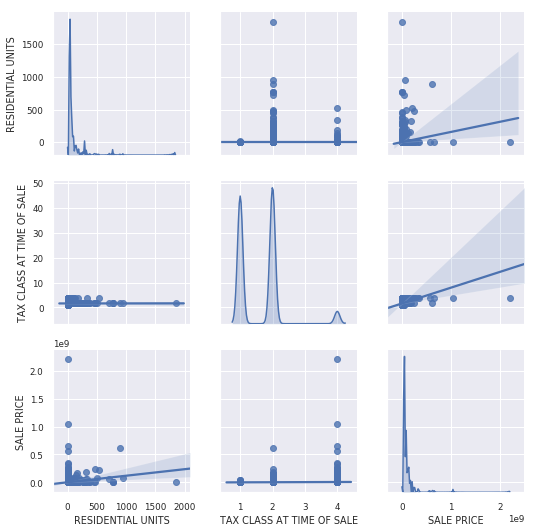

In [14]:
# График признаков попарно с разделением по типу
%config InlineBackend.figure_format = 'png' # формат изображений PNG, для сокращения времени отрисовки графиков
sns.pairplot(data[features + target], 
            #hue = 'Type', # Признак разделения
            kind="reg", # Fit linear regression models to the scatter plots:
            diag_kind = 'kde', # Признак разделения тип графика
            ); 

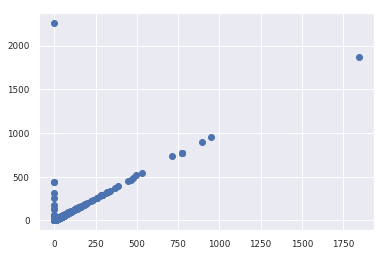

In [15]:
#plt.scatter(data['ZIP CODE'],data['TOTAL UNITS'])
plt.scatter(data['RESIDENTIAL UNITS'],data['TOTAL UNITS'])

### Просмотр характеристик выбранных признаков

RESIDENTIAL UNITS 0 1844
TAX CLASS AT TIME OF SALE 1 4


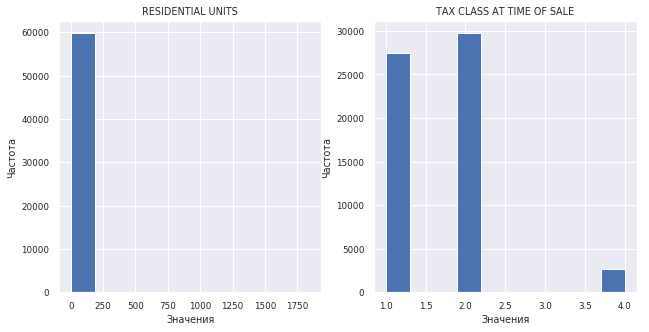

In [16]:
# Строим гистограммы по каждому признаку: 
#data[features].hist() #Упрощенный вывод графиков

plt.figure(figsize=(16, 5))
plot_number = 0
for feature_name in features:
    plot_number += 1
    plt.subplot(1,3,plot_number)
    plt.hist(data[feature_name])
    
    #plt.xlim( data[feature_name].min(), data[feature_name].max() )
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print feature_name, data[feature_name].min(), data[feature_name].max()

### Признак 'RESIDENTIAL UNITS'

In [17]:
data[['RESIDENTIAL UNITS']].describe()

,RESIDENTIAL UNITS
count,59759.000000
mean,1.728208
std,14.159398
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,1844.000000


<Figure size 1152x360 with 0 Axes>

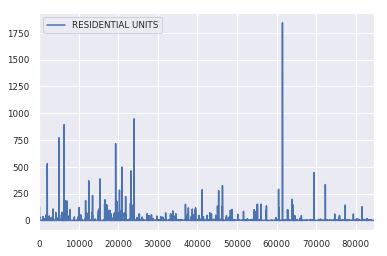

In [18]:
plt.figure(figsize=(16, 5))
data[['RESIDENTIAL UNITS']].plot(kind='line')

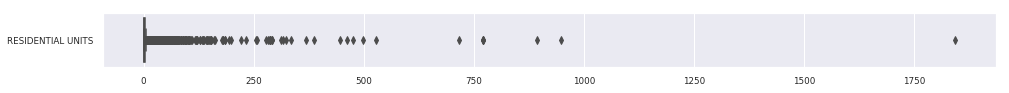

In [19]:
plt.figure(figsize=(16, 1))
sns.boxplot( data=data[['RESIDENTIAL UNITS']], orient="h")

In [20]:
dcount = data['RESIDENTIAL UNITS'].count() # кол-во эл. общее
dmean = data['RESIDENTIAL UNITS'].mean() # среднее зн. общее
over_count = len(data[data['RESIDENTIAL UNITS'] > 200]) # кол-во эл. выше порогового
over_mean = data[ data['RESIDENTIAL UNITS']  > 200 ]['RESIDENTIAL UNITS'].mean()  # среднее зн. выше порогового

print "В выборке обнаружен \"выброс\" - {} из {} значение(ий) с величиной отличающейся в {:.3f} раз чем у {:.6f} части оставшейся выборки.".format( 
    over_count,
    dcount,
    over_mean / dmean, 
    (dcount - over_count * 1.0) / dcount )

В выборке обнаружен "выброс" - 33 из 59759 значение(ий) с величиной отличающейся в 267.960 раз чем у 0.999448 части оставшейся выборки.


Данные элементы будут отброшены и не будут учитываться в дальнейшем анализе.

In [21]:
# оставить строки, с значение ниже порогового
data = data[  ~  (data['RESIDENTIAL UNITS'] > 200) ]
data = data[data['RESIDENTIAL UNITS'] != 0]

In [22]:
len(data['RESIDENTIAL UNITS'])

41031

In [23]:
data[['RESIDENTIAL UNITS']].describe()

,RESIDENTIAL UNITS
count,41031.000000
mean,2.144574
std,6.195150
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,198.000000


<Figure size 1152x360 with 0 Axes>

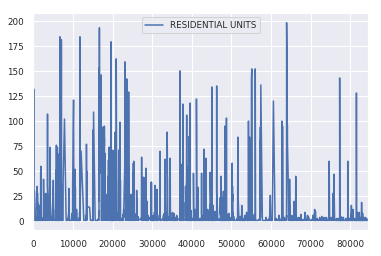

In [24]:
plt.figure(figsize=(16, 5))
data[['RESIDENTIAL UNITS']].plot(kind='line')

In [25]:
data['RESIDENTIAL UNITS'].value_counts().head(10)

1     25968
2     10282
3      2525
4       717
6       373
8       153
5       138
10       79
7        68
9        64
Name: RESIDENTIAL UNITS, dtype: int64

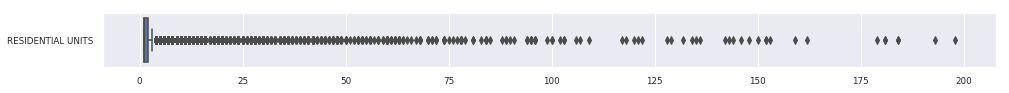

In [26]:
plt.figure(figsize=(16, 1))
sns.boxplot( data=data[['RESIDENTIAL UNITS']], orient="h")

RESIDENTIAL UNITS 1 198
TAX CLASS AT TIME OF SALE 1 4


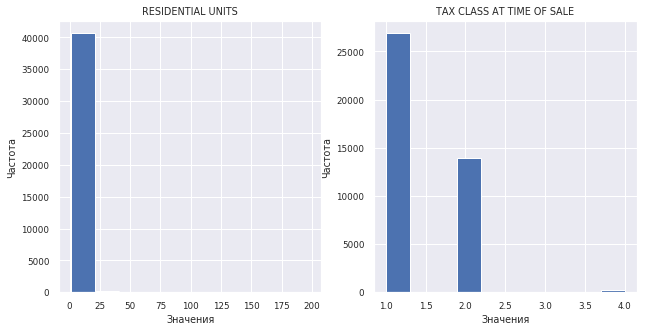

In [27]:
# Строим гистограммы по каждому признаку: 
#data[features].hist() #Упрощенный вывод графиков

plt.figure(num=1, figsize=(16, 5))
plot_number = 0
for feature_name in features:
    plot_number += 1
    plt.subplot(1,3,plot_number)
    plt.hist(data[feature_name])
    #plt.xlim( data[feature_name].min(), data[feature_name].max() )
    
    plt.title(feature_name)
    plt.xlabel(u'Значения')
    plt.ylabel(u'Частота')
    print feature_name, data[feature_name].min(), data[feature_name].max()

### Гистограмма целевой переменной

In [28]:
data[target].describe()

,SALE PRICE
count,4.103100e+04
mean,1.299644e+06
std,3.305081e+06
min,1.000000e+00
25%,4.450000e+05
50%,6.800000e+05
75%,1.115000e+06
max,1.725000e+08


In [29]:
data = data[data['SALE PRICE'] != 10]
print data['SALE PRICE'].value_counts().head(10)
data['TAX CLASS AT TIME OF SALE'].value_counts().head(10)

600000    336
650000    323
550000    321
450000    319
700000    318
400000    298
750000    290
500000    278
900000    267
800000    265
Name: SALE PRICE, dtype: int64


1    26357
2    13779
4      195
Name: TAX CLASS AT TIME OF SALE, dtype: int64

<Figure size 1152x360 with 0 Axes>

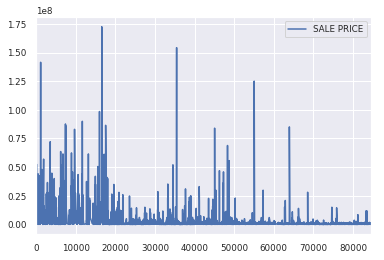

In [30]:
plt.figure(figsize=(16, 5))
data[target].plot(kind='line')

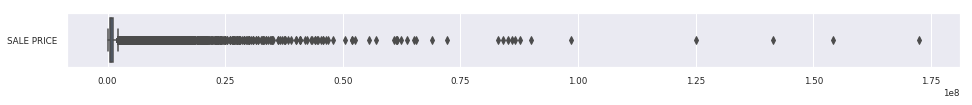

In [31]:
plt.figure(figsize=(16, 1))
sns.boxplot( data=data[target], orient="h")

In [32]:
dcount = data['SALE PRICE'].count() # кол-во эл. общее
dmean = data['SALE PRICE'].mean() # среднее зн. общее
over_count = len(data[data['SALE PRICE'] > 23000000]) # кол-во эл. выше порогового
over_mean = data[ data['SALE PRICE']  > 23000000 ]['SALE PRICE'].mean()  # среднее зн. выше порогового

print "В выборке обнаружен \"выброс\" - {} из {} значение(ий) с величиной отличающейся в {:.3f} раз чем у {:.6f} части оставшейся выборки.".format( 
    over_count,
    dcount,
    over_mean / dmean, 
    (dcount - over_count * 1.0) / dcount )

В выборке обнаружен "выброс" - 135 из 40331 значение(ий) с величиной отличающейся в 31.562 раз чем у 0.996653 части оставшейся выборки.


In [33]:
data = data[  ~  (data['SALE PRICE'] > 23000000) ]

Коэфф. асимметрии, эксцесса в числовом виде


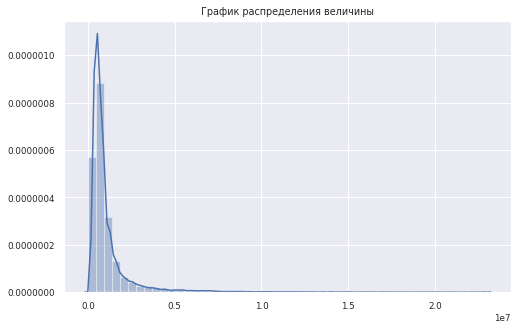

In [34]:
plt.figure(figsize=(8,5))
sns.distplot(data[target],  hist=True) # Ядерная оценка плотности (KDE - Kernel density estimation)
plt.title(u'График распределения величины')
print "Коэфф. асимметрии, эксцесса в числовом виде"

((array([-4.14160715, -3.93351091, -3.81996654, ...,  3.81996654,
          3.93351091,  4.14160715]),
  array([       1,        1,        1, ..., 23000000, 23000000, 23000000])),
 (1254045.7908988122, 1186483.2983878988, 0.6723566896299799))

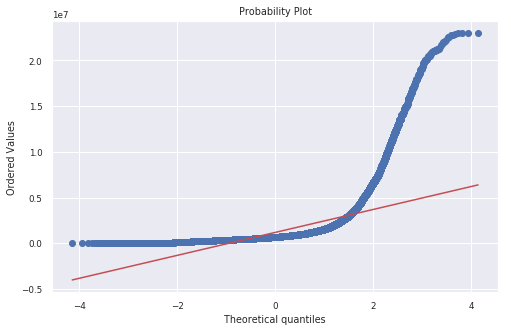

In [35]:
# диаграмма вероятности
plt.figure(figsize=(8,5))
stats.probplot(data['SALE PRICE'], plot=plt)

## Построение регрессионных моделей

In [36]:
valid_size = 0.3 # доля тестовой части в выборке
rand_seed = 8 # начальное состояние генератора случ. чисел

x_train, x_test, y_train, y_test =  train_test_split(
    data[features], data[target], # исходные данные
    test_size = valid_size, 
    random_state=rand_seed, 
    shuffle=True # перемешивание
) 

In [37]:
print "Кол-во элементов: \n  x_train: {}, y_train {} \n  x_test:  {}, y_test  {} \n  total x: {}, total y {} ".format  (
    len(x_train), len(y_train),
    len(x_test),  len(x_test), 
    len(x_train)+len(x_test), len(y_train)+len(x_test),
)

Кол-во элементов: 
  x_train: 28137, y_train 28137 
  x_test:  12059, y_test  12059 
  total x: 40196, total y 40196 


In [38]:
x_train[:3]

,RESIDENTIAL UNITS,TAX CLASS AT TIME OF SALE
8439,1,2
61924,3,1
53459,1,1


In [39]:
y_train[:3]

,SALE PRICE
8439,3100000
61924,667479
53459,650000


In [40]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression

### Одномерная модель от признака 'RESIDENTIAL UNITS'

In [41]:
lr = linear_model.LinearRegression()

x1 = x_train['RESIDENTIAL UNITS'].values.reshape(-1, 1)
y1 = y_train['SALE PRICE'].values.reshape(-1, 1)
x2 = x_test['RESIDENTIAL UNITS'].values.reshape(-1, 1)
y2 = y_test['SALE PRICE'].values.reshape(-1, 1)

In [42]:
# Вычислить коэфф. на тренировочном наборе
lin_model = lr.fit(x1, y1)
# Получить предсказание на проверочном наборе
y_pred  = lin_model.predict(x2)

<Figure size 1080x360 with 0 Axes>

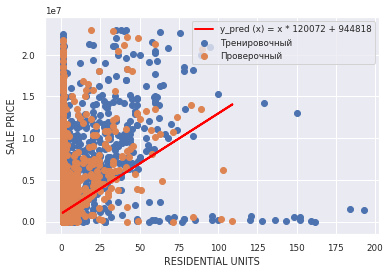

In [43]:
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='red',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('RESIDENTIAL UNITS')
ax.set_ylabel(target[0])

plt.show()

Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

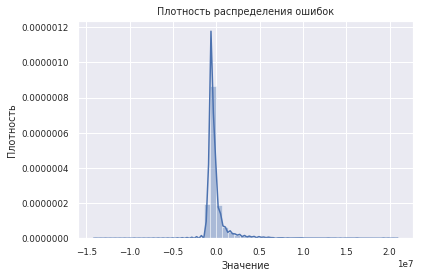

In [44]:
plt.figure(figsize=(6,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

In [45]:
print "y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0])

print "MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred))
print "MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred))
print "RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) ))
print "R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred))

y_pred (x) = x * 120072 + 944818

MAE Mean absolute error: 841018
MSE Mean squared error: 2925920779145
RMSE: 1710532
R2 of Linear Regression (1 is perfect): 0.124


In [46]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

,__Проверочное,_Предсказанные,Ошибка
0,1055000,1.064890e+06,-9890.406363
1,800000,1.064890e+06,-264890.406363
2,1130000,1.305035e+06,-175035.132475
3,380000,1.064890e+06,-684890.406363
4,830000,1.184963e+06,-354962.769419


Text(0,0.5,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u043d\u043e\u0435 Y')

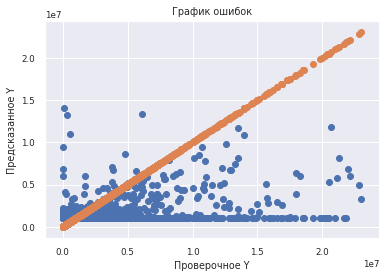

In [47]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0,0.5,u'\u0410\u0431\u0441\u043e\u043b\u044e\u0442\u043d\u0430\u044f \u043e\u0448\u0438\u0431\u043a\u0430')

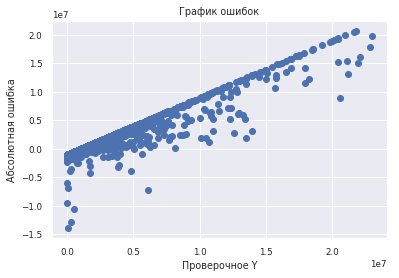

In [48]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

###  Одномерная модель от признака 'TAX CLASS AT TIME OF SALE'

In [49]:
lr = linear_model.LinearRegression()

x1 = x_train['TAX CLASS AT TIME OF SALE'].values.reshape(-1, 1)
y1 = y_train['SALE PRICE'].values.reshape(-1, 1)
x2 = x_test['TAX CLASS AT TIME OF SALE'].values.reshape(-1, 1)
y2 = y_test['SALE PRICE'].values.reshape(-1, 1)

In [50]:
# Вычислить коэфф. на тренировочном наборе
lin_model = lr.fit(x1, y1)
# Получить предсказание на проверочном наборе
y_pred  = lin_model.predict(x2)

<Figure size 1080x360 with 0 Axes>

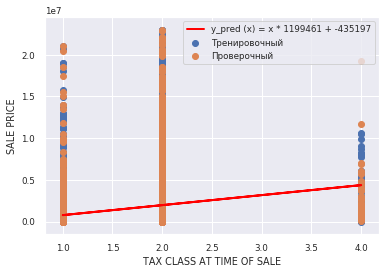

In [51]:
plt.figure(figsize=(15,5))
fig, ax = plt.subplots()
ax.scatter(x1, y1, label=u'Тренировочный') # тренировочный
ax.scatter(x2, y2, label=u'Проверочный') # проверочный
ax.plot( x2, y_pred, lw=2, color='red',
        label="y_pred (x) = x * {:.0f} + {:.0f}".format(lin_model.coef_[0][0], lin_model.intercept_[0]))
ax.legend(loc="best")
ax.set_xlabel('TAX CLASS AT TIME OF SALE')
ax.set_ylabel(target[0])

plt.show()

Text(0.5,0,u'\u0417\u043d\u0430\u0447\u0435\u043d\u0438\u0435')

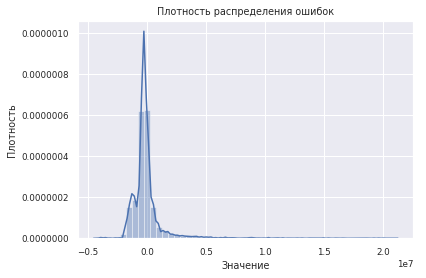

In [52]:
plt.figure(figsize=(6,4))
sns.distplot(y2 - y_pred)
plt.title(u'Плотность распределения ошибок');
plt.ylabel(u'Плотность')
plt.xlabel(u'Значение')

In [53]:
print "y_pred (x) = x * {:.0f} + {:.0f}\n".format(lin_model.coef_[0][0], lin_model.intercept_[0])

print "MAE Mean absolute error: {:.0f}".format( mean_absolute_error(y2, y_pred))
print "MSE Mean squared error: {:.0f}".format( mean_squared_error(y2, y_pred))
print "RMSE: {:.0f}".format(np.sqrt( mean_squared_error(y2, y_pred) ))
print "R2 of Linear Regression (1 is perfect): {:.3f}".format( r2_score(y2, y_pred))

y_pred (x) = x * 1199461 + -435197

MAE Mean absolute error: 810763
MSE Mean squared error: 2984955423457
RMSE: 1727702
R2 of Linear Regression (1 is perfect): 0.106


In [54]:
df = { u'__Проверочное':  y2.reshape(1,-1)[0],
       u'_Предсказанные': y_pred.reshape(1,-1)[0],
       u'Ошибка':  (y2 - y_pred).reshape(1,-1)[0]} 
df = pd.DataFrame(df) 
df.head()

,__Проверочное,_Предсказанные,Ошибка
0,1055000,1.963726e+06,-908725.650212
1,800000,7.642642e+05,35735.811022
2,1130000,7.642642e+05,365735.811022
3,380000,7.642642e+05,-384264.188978
4,830000,7.642642e+05,65735.811022


Text(0,0.5,u'\u041f\u0440\u0435\u0434\u0441\u043a\u0430\u0437\u0430\u043d\u043d\u043e\u0435 Y')

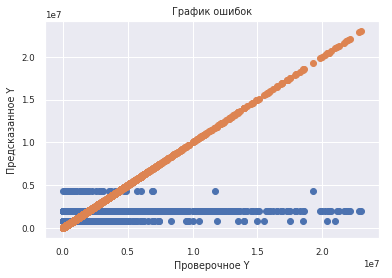

In [55]:
plt.scatter(y2,y_pred)
plt.scatter(y2,y2)
plt.title(u'График ошибок');
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Предсказанное Y')

Text(0,0.5,u'\u0410\u0431\u0441\u043e\u043b\u044e\u0442\u043d\u0430\u044f \u043e\u0448\u0438\u0431\u043a\u0430')

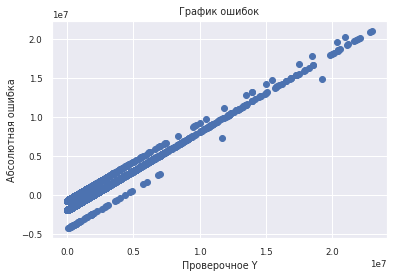

In [56]:
plt.scatter(y2,y2- y_pred)

plt.title(u'График ошибок')
plt.xlabel(u'Проверочное Y')
plt.ylabel(u'Абсолютная ошибка')

## Вывод
Не наблюдается корреляция между ценой продажи и количеством помещений. Корреляция между ценой продажи и классом налога на момент продажи также отсутствует.

## Для ЛР2


In [58]:
#Сохраняем данные в csv
data.to_csv('../Lab2/data.csv', index=False)

In [59]:
data.shape


(40196, 22)